In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#### Summarizing the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?


In [2]:
happiness = pd.read_csv('happiness_data.csv')
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB



#### From the above tables ,

- We can see that there are total 1949 rows or examples in the dataset and each instance has 11 columns or features. Out of the 11 features, the "Country name" feature is of type object, i.e. string, the "Year" feature is integer and rest all the features are continuous valued feature of type float. Thus, we can say that we have total 10 continuous valued features including the "Year" column.

- Only 1 attribute, viz. "Country name", is a categorical feature as it represents the country from which data is collected in each example.


Displaying the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explaining noticeable traits for key attributes. 

In [4]:
happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [5]:
# Dropping the 'year' and 'Life Ladder' columns
hdf = happiness.drop(columns=['year', 'Life Ladder'])
hdf.describe()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


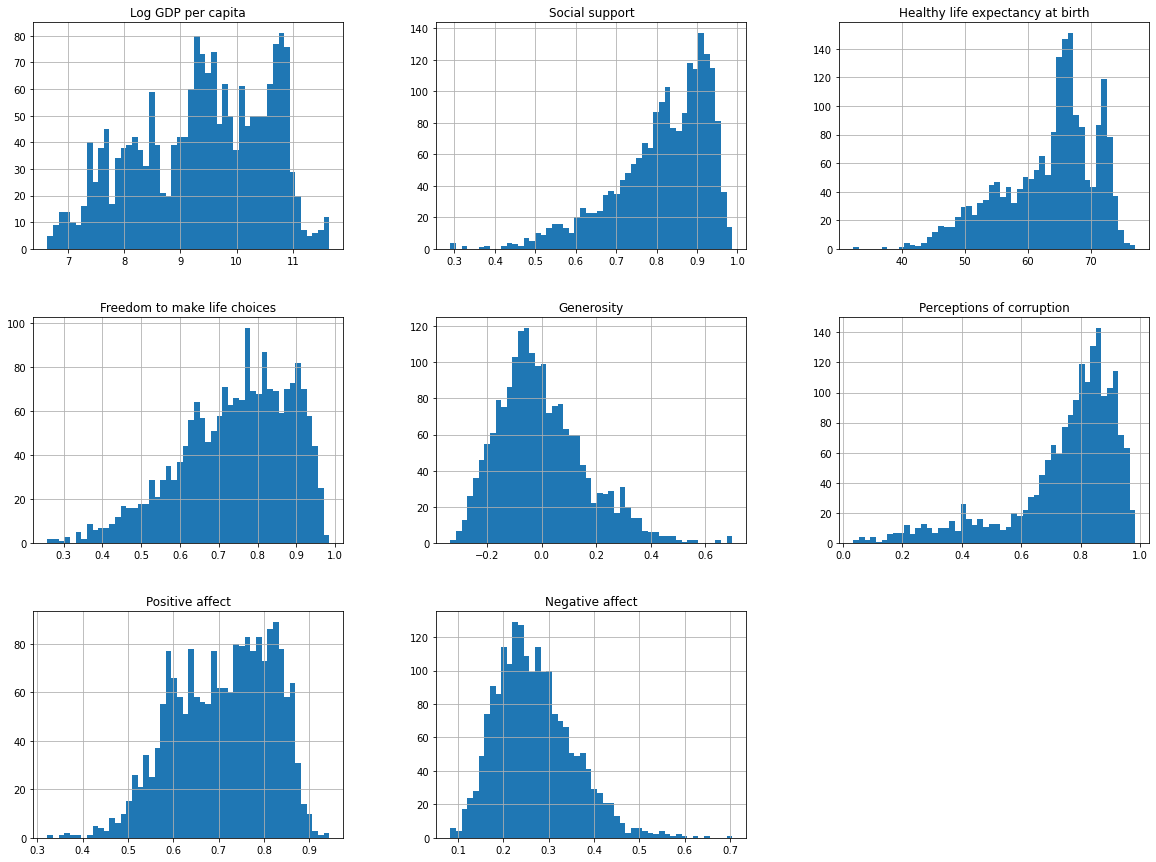

In [6]:
%matplotlib inline
hdf.hist(bins=50, figsize=(20,15))
plt.show()


The statistical value, showing the mean, standard deviation, minimum, maximum, 1st quartile, 2nd quartile, median and 3rd quartile of each attribute, is displayed in the above cells along with the histogram of the distribution of each attribute. <br>
From the statistical values, 
 - we can infer that the NULL values have been ignored while computing the statistical data for all the columns as the count value of each of these attributes is less than 1949(total count of examples in the dataset).
 - Also, all the columns except Log GDP per capita and Healthy life expectancy, seem to be scaled between 0 and 1 with Generosity scaled between -1 and 1.

From the graph,
- we can see that some of the features extend much farther to the right of the median than to the left, i.e. they
are tail-heavy.

Attribute Treatments:
- The Log GDP per capita attribute might need to be scaled within 0 and 1 so that all the attributes are on same scale which will improve the model's convergence speed and avoid any undesirable effects when using SGD regression.

In [7]:
hdf.isna().sum()

Country name                          0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [8]:
hdf.columns

Index(['Country name', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

- There are certain null values which needs to be taken care of like Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect'

In [9]:
# Filling the null values with mean of the respective column
hdf=hdf.fillna(hdf.mean(numeric_only=True))

In [10]:
hdf.isna().sum()

Country name                        0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

Analyzing and discussing the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [11]:
# Correlation between data attributes
hdf.corr()

/var/folders/n6/n7mdsvnj1h139xzhkgtby_xm0000gn/T/ipykernel_19888/1116181437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hdf.corr()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Log GDP per capita,1.000000,0.682438,0.834455,0.361404,-0.000901,-0.333645,0.297011,-0.204615
Social support,0.682438,1.000000,0.613854,0.408765,0.065510,-0.216028,0.430414,-0.395676
Healthy life expectancy at birth,0.834455,0.613854,1.000000,0.382536,0.020276,-0.311815,0.313989,-0.135599
Freedom to make life choices,0.361404,0.408765,0.382536,1.000000,0.319785,-0.476264,0.602743,-0.264397
Generosity,-0.000901,0.065510,0.020276,0.319785,1.000000,-0.278440,0.349683,-0.088906
Perceptions of corruption,-0.333645,-0.216028,-0.311815,-0.476264,-0.278440,1.000000,-0.290161,0.257595
Positive affect,0.297011,0.430414,0.313989,0.602743,0.349683,-0.290161,1.000000,-0.372901
Negative affect,-0.204615,-0.395676,-0.135599,-0.264397,-0.088906,0.257595,-0.372901,1.000000


In [12]:
# Pearson Correlation Coefficient (PCC) matrix
corr_df = hdf.corr()
corr_df['Healthy life expectancy at birth'].sort_values(ascending=False)

/var/folders/n6/n7mdsvnj1h139xzhkgtby_xm0000gn/T/ipykernel_19888/3211616253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = hdf.corr()


Healthy life expectancy at birth    1.000000
Log GDP per capita                  0.834455
Social support                      0.613854
Freedom to make life choices        0.382536
Positive affect                     0.313989
Generosity                          0.020276
Negative affect                    -0.135599
Perceptions of corruption          -0.311815
Name: Healthy life expectancy at birth, dtype: float64

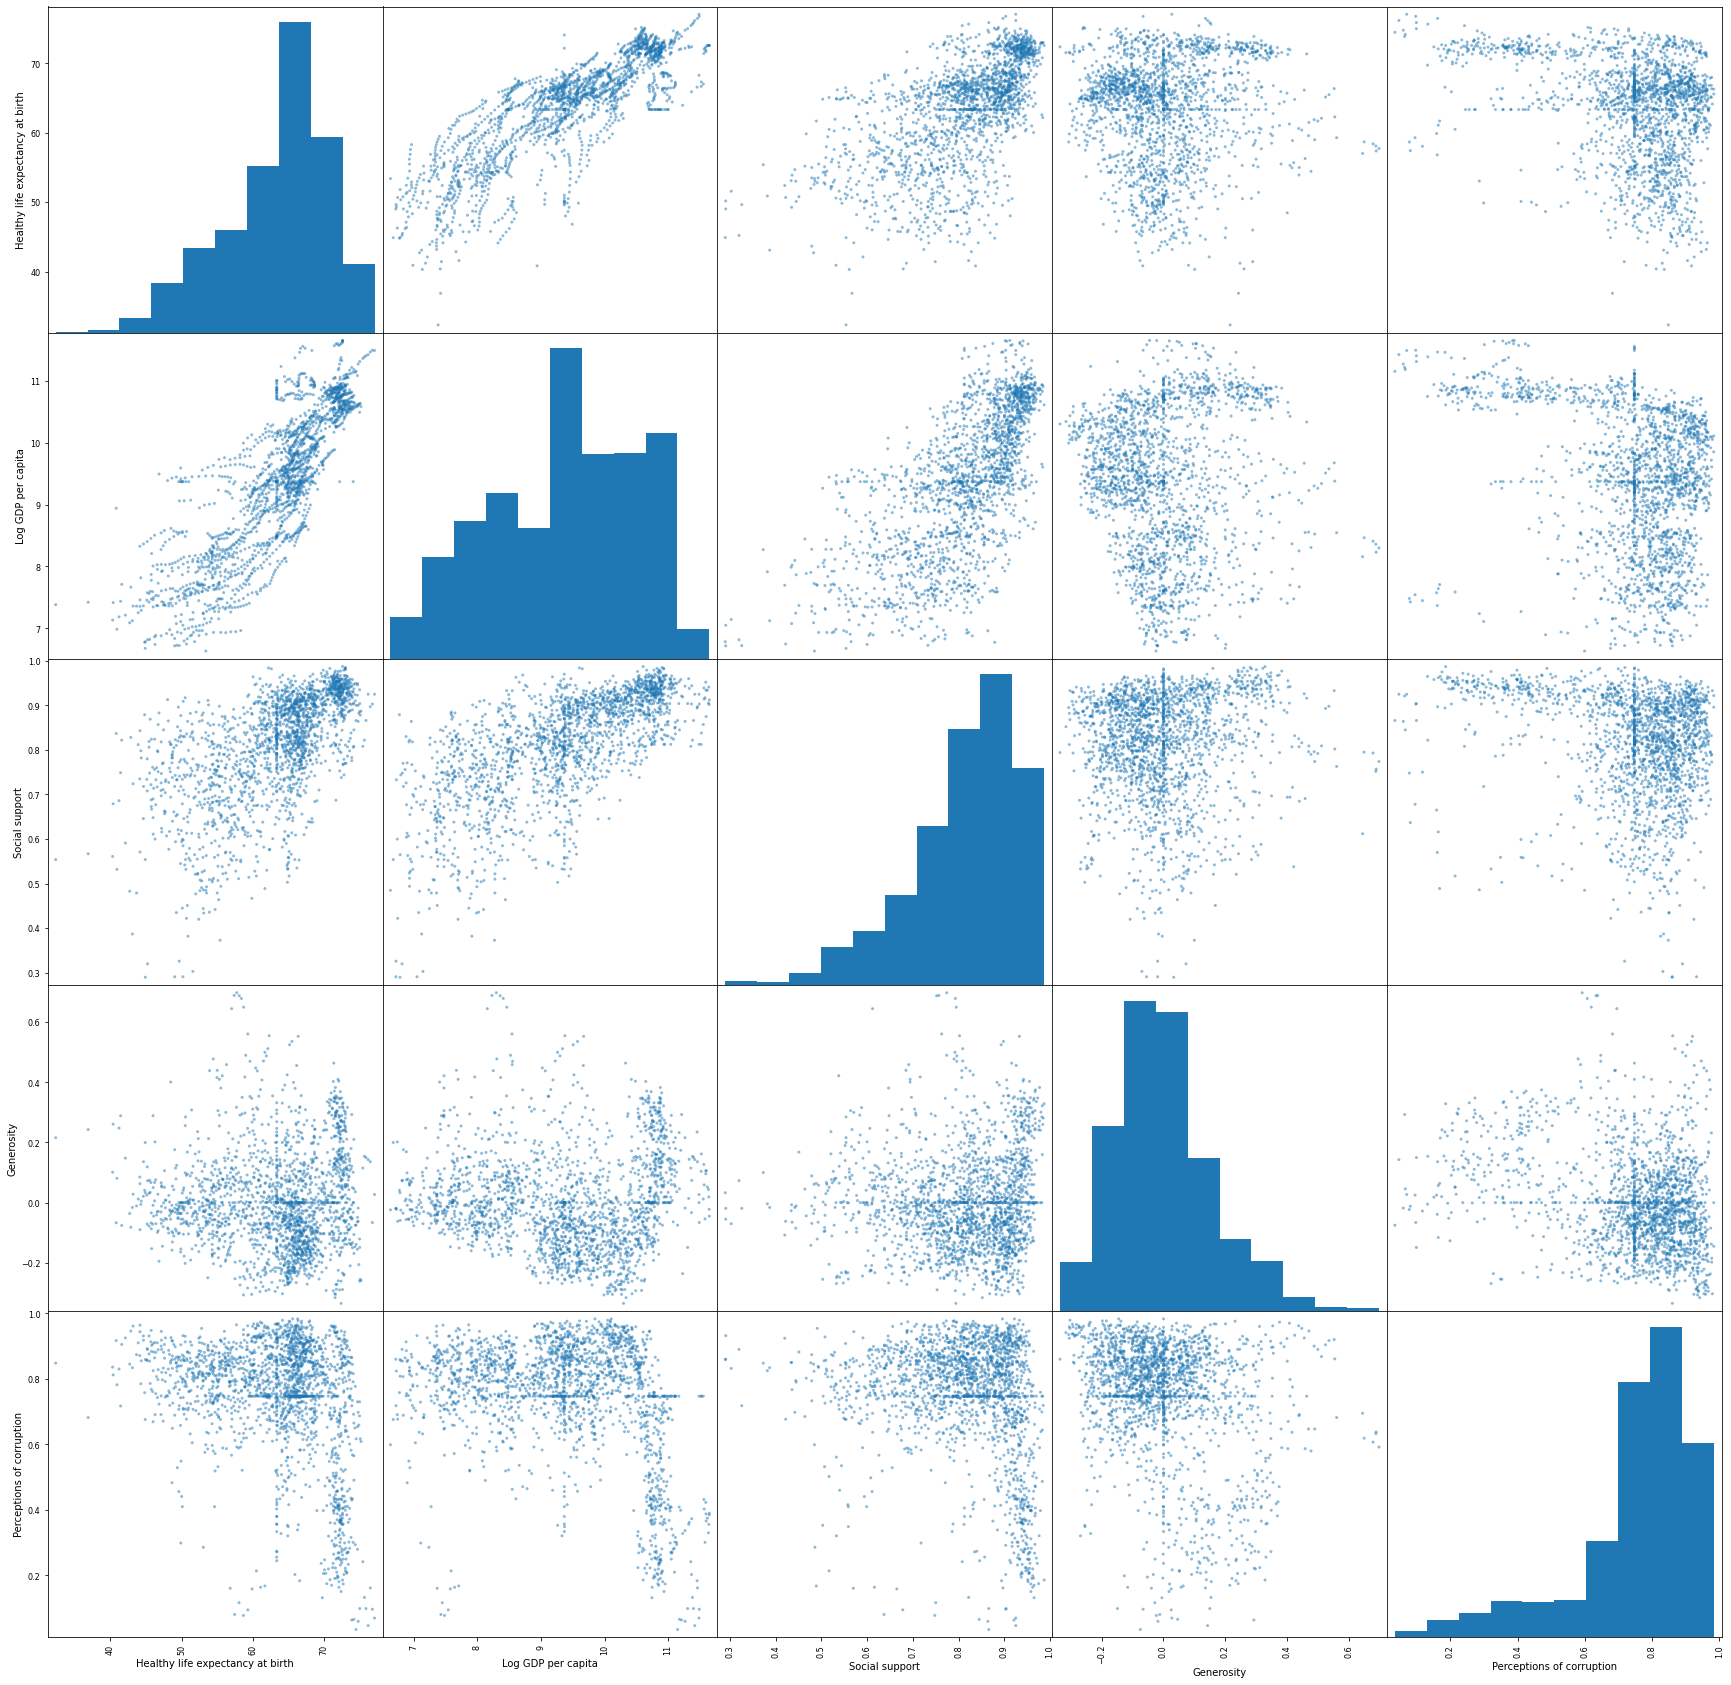

In [13]:
# Scatter plots
attributes = ['Healthy life expectancy at birth', 'Log GDP per capita', 'Social support', 'Generosity', 'Perceptions of corruption']
scatter_matrix(hdf[attributes], figsize=(30,30))
plt.show()



- From the correlation matrix and scatter plots, <br>
 we can see that the target 'Healthy life expectancy' has very strong positive correlation with the feature 'Log GDP per capita'. <br>
- Taking a close look at this subplot, we can say that there is a strong correlation between feature 'Log GDP per capita' and target 'Healthy life expectancy' which is evident from the upward trend with low dispersion.


Selecting 20% of the data for testing and verifying that your test portion of the data is representative of the entire dataset.

In [14]:
hdf["GDP category"] = pd.cut(hdf["Log GDP per capita"], bins=[0., 7.5, 9.0, 10.0, 10.8, np.inf], labels=[1,2,3,4,5])

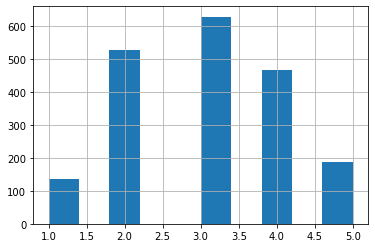

In [15]:
hdf["GDP category"].hist()
plt.show()

To make sure that the test set is representative of the entire dataset, we divide the dataset into homogenous
subgroups of different Log GDP per capita ranges as we can see from the above histograms that this feature can be easily divided into few strata with each of them having enough instances to sample from.

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=33)
for train_index, test_index in split.split(hdf.dropna(subset=['GDP category']), hdf["GDP category"].dropna()):
    train_set = hdf.loc[train_index]
    test_set = hdf.loc[test_index]

In [17]:
test_set["GDP category"].value_counts() / len(test_set)

3    0.323077
2    0.271795
4    0.238462
5    0.097436
1    0.069231
Name: GDP category, dtype: float64

In [18]:
hdf["GDP category"].value_counts()/ len(hdf["GDP category"])

3    0.322730
2    0.271421
4    0.239097
5    0.096973
1    0.069779
Name: GDP category, dtype: float64

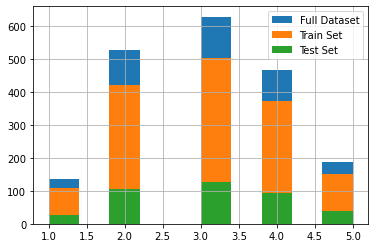

In [19]:
ax1 = hdf['GDP category'].hist(label='Full Dataset')
train_set['GDP category'].hist(label='Train Set')
test_set['GDP category'].hist(label='Test Set')
plt.legend()
plt.show()

### Verification
From the above histogram and the proportions observed , we can infer that the test set has GDP category proportions almost identical to those in the full dataset. Thus, it is verified that the test portion of the data is representative of the entire dataset.

In [20]:
# Dropping the 'GDP category' column
for set in (train_set, test_set):
    set.drop(columns='GDP category', inplace=True)

In [22]:
# Feature scaling and Ordinal encoding of categorical attributes
full_pipeline = ColumnTransformer([
    ('categoricalEncoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Country name']),
    ('scaling', StandardScaler(), ['Log GDP per capita'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

train = full_pipeline.fit_transform(train_set)
test = full_pipeline.transform(test_set)

In [23]:
# Separating input features and target in both training and testing sets
train_x = train.drop(columns='Healthy life expectancy at birth')
train_y = train['Healthy life expectancy at birth'].copy()
test_x = test.drop(columns='Healthy life expectancy at birth')
test_y = test['Healthy life expectancy at birth'].copy()

Training a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Performing Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Exploring the impact of other hyperparameters, like batch size and learning rate (no need for grid search).

In [24]:
# Adding x0 = 1 to each instance of both training and testing sets
# This will be used only with Normal Equation
train_x_b = np.c_[np.ones(train_x.shape[0]), train_x]
test_x_b = np.c_[np.ones(test_x.shape[0]), test_x]

# Computing the model parameters using Normal Equation
theta_best = np.linalg.inv(train_x_b.T.dot(train_x_b)).dot(train_x_b.T).dot(train_y)
theta_best

array([ 5.28615904e+01, -5.46210827e-03,  5.38708661e+00,  6.73191215e+00,
        3.05244439e+00, -7.09602601e-01, -1.46260296e+00,  3.03341651e+00,
        8.06460052e+00])

In [25]:
# Using scikit-learn (more efficient as compared to above approach as sklearn uses SVD) (add url to docs where it says svd is used)
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)
lin_reg.intercept_, lin_reg.coef_

(52.861590434531976,
 array([-5.46210827e-03,  5.38708661e+00,  6.73191215e+00,  3.05244439e+00,
        -7.09602601e-01, -1.46260296e+00,  3.03341651e+00,  8.06460052e+00]))

we can see that the sklearn library's LinearRegression also computes the model parameters using the Normal Equation.

In [26]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

Four-fold cross-validation

In [27]:
lin_scores = cross_val_score(lin_reg, train_x, train_y, scoring='neg_mean_squared_error', cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.1526165  4.14139094 3.9605858  3.74863861]
Mean: 4.000807962699316
Standard Deviation: 0.1643294057298882


In [30]:
# Evaluating the model on the test set
test_predictions = lin_reg.predict(test_x)
test_mse = mean_squared_error(test_predictions, test_y)
test_rmse = np.sqrt(test_mse)
print("RMSE",test_rmse)

RMSE 3.8779848669912833


In [31]:
tr_x, val_x,tr_y,val_y = train_test_split(train_x,train_y, test_size=0.1, random_state=33)


In [32]:
def train_loop(title, n_epochs=100, penalty='l2', learning_rate='invscaling'):
    sgd_reg = SGDRegressor(penalty=penalty, learning_rate=learning_rate, eta0=0.0001)

    loss = {'train':[], 'val':[]}
    iterations = []

    for epoch in range(n_epochs):
        sgd_reg.partial_fit(tr_x, tr_y)
        train_pred = sgd_reg.predict(tr_x)
        val_pred = sgd_reg.predict(val_x)
        
        train_loss = mean_squared_error(tr_y, train_pred, squared=False)
        val_loss = mean_squared_error(val_y, val_pred, squared=False)

        loss['train'].append(train_loss)
        loss['val'].append(val_loss)
        iterations.append(epoch+1)

    print(f'Intercept: {sgd_reg.intercept_}')
    print(f'Coefficients: {sgd_reg.coef_}')

    plt.plot(iterations, loss['train'], label='Train Loss')
    plt.plot(iterations, loss['val'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Training Iteration')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

    return loss

Intercept: [10.61882528]
Coefficients: [ 0.27955282  3.69575356  8.65566505  8.07386131 -0.17110583  7.61971595
  7.61800618  2.99180233]


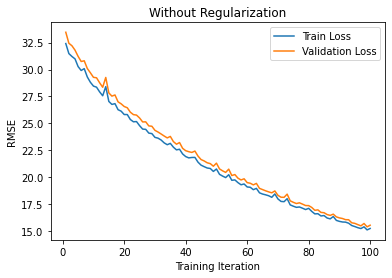

In [33]:
noRegLoss = train_loop(title='Without Regularization', penalty=None)

Intercept: [10.61611829]
Coefficients: [ 0.24922953  3.69346423  8.65208934  8.07244007 -0.16772221  7.61749596
  7.616605    2.98873602]


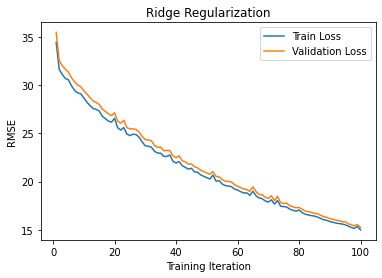

In [34]:
RidgeLoss = train_loop('Ridge Regularization')

Intercept: [10.6143669]
Coefficients: [ 0.28727734  3.68443701  8.65021255  8.07230007 -0.16968718  7.61282718
  7.61708368  2.98712267]


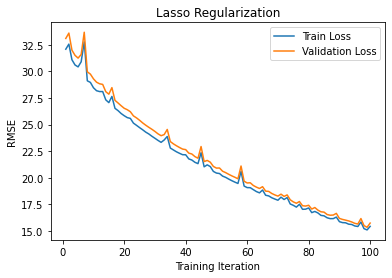

In [35]:
LassoLoss = train_loop('Lasso Regularization', penalty='l1')

ElasticNetLoss = train_loop('Elastic Net Regularization', penalty='elasticnet')

Intercept: [21.05717749]
Coefficients: [ 0.01643372  4.57408734 15.30286047 13.84882291 -0.79358706 11.67613507
 12.90796117  6.55547773]


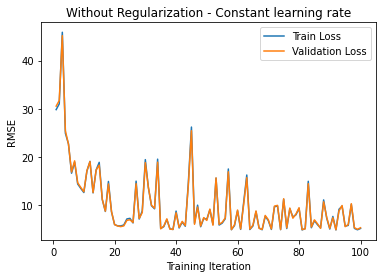

In [37]:
constLearningRate = train_loop(title='Without Regularization - Constant learning rate', penalty=None, learning_rate='constant')

## Mini Batch

In [102]:

def mini_batch_gd(X, y, batch_size, learning_rate, ep):
    theta = np.random.randn(X.shape[1], 1)
    m = len(X)
    n_batches_per_epoch = (int) (m / batch_size)
    all_thetas = []
    for it in range(1, ep + 1):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X.iloc[shuffled_indices].values
        y_shuffled = y.iloc[shuffled_indices].values
        for iteration in range(0, n_batches_per_epoch):
            idx = iteration * batch_size
            xi = X_b_shuffled[idx : idx + batch_size]
            yi = y_shuffled[idx : idx + batch_size]
            grads = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)
            lg = learning_rate*grads
            theta = theta - lg
        all_thetas.append(theta)
    
    return (theta, all_thetas)

In [103]:
def calculate_loss(theta, x_t, y_t):
    y_p = []
    for i in range(0, len(x_t)):
        x = x_t.iloc[i]
        y_p.append(x.dot(theta))
    mse = mean_squared_error(y_t, y_p)
    # print(mse, "MSE here")
    return mse

In [118]:
tr_y=pd.DataFrame(tr_y)
val_y=pd.DataFrame(val_y)

In [128]:
x_train, x_val, y_train, y_val = tr_x, val_x,tr_y,val_y
mms = MinMaxScaler()
x_train = pd.DataFrame(mms.fit_transform(x_train), columns = x_train.columns)
x_val = pd.DataFrame(mms.fit_transform(x_val), columns = x_val.columns)
train_loss = []
val_loss = []
iterations = 40
theta, theta_itr = mini_batch_gd(x_train, y_train, 250, 0.01, iterations)
for it in range(1, iterations):
    train_loss.append(calculate_loss(theta_itr[it], x_train, y_train))
    val_loss.append(calculate_loss(theta_itr[it], x_val, y_val))

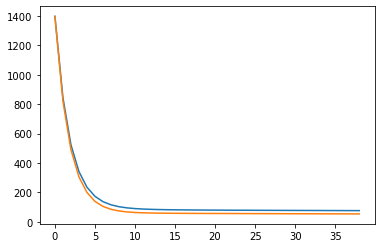

In [129]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.show()

In [130]:
x_train, x_val, y_train, y_val = tr_x, val_x,tr_y,val_y
mms = MinMaxScaler()
x_train = pd.DataFrame(mms.fit_transform(x_train), columns = x_train.columns)
x_val = pd.DataFrame(mms.fit_transform(x_val), columns = x_val.columns)
train_loss = []
val_loss = []
iterations = 1000
theta, theta_itr = mini_batch_gd(x_train, y_train,200, 0.01, iterations)
for it in range(1, iterations):
    train_loss.append(calculate_loss(theta_itr[it], x_train, y_train))
    val_loss.append(calculate_loss(theta_itr[it], x_val, y_val))

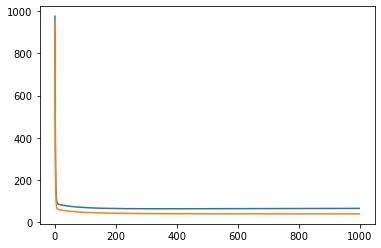

In [131]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.show()

In [132]:
x_train, x_val, y_train, y_val = tr_x, val_x,tr_y,val_y
mms = MinMaxScaler()
x_train = pd.DataFrame(mms.fit_transform(x_train), columns = x_train.columns)
x_val = pd.DataFrame(mms.fit_transform(x_val), columns = x_val.columns)
train_loss = []
val_loss = []
iterations = 1000
theta, theta_itr = mini_batch_gd(x_train, y_train,250, 0.01, iterations)
for it in range(1, iterations):
    train_loss.append(calculate_loss(theta_itr[it], x_train, y_train))
    val_loss.append(calculate_loss(theta_itr[it], x_val, y_val))

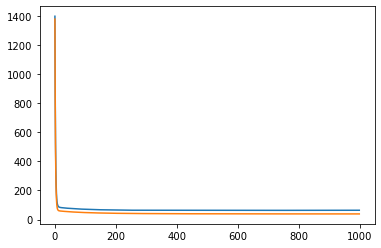

In [133]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.show()

In [135]:
x_train, x_val, y_train, y_val = tr_x, val_x,tr_y,val_y
mms = MinMaxScaler()
x_train = pd.DataFrame(mms.fit_transform(x_train), columns = x_train.columns)
x_val = pd.DataFrame(mms.fit_transform(x_val), columns = x_val.columns)
train_loss = []
val_loss = []
iterations = 100
theta, theta_itr = mini_batch_gd(x_train, y_train,300, 0.01, iterations)
for it in range(1, iterations):
    train_loss.append(calculate_loss(theta_itr[it], x_train, y_train))
    val_loss.append(calculate_loss(theta_itr[it], x_val, y_val))

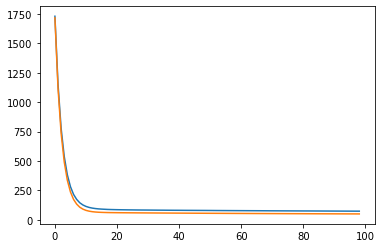

In [136]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.show()

In [137]:
x_train, x_val, y_train, y_val = tr_x, val_x,tr_y,val_y
mms = MinMaxScaler()
x_train = pd.DataFrame(mms.fit_transform(x_train), columns = x_train.columns)
x_val = pd.DataFrame(mms.fit_transform(x_val), columns = x_val.columns)
train_loss = []
val_loss = []
iterations = 50
theta, theta_itr = mini_batch_gd(x_train, y_train,100, 0.01, iterations)
for it in range(1, iterations):
    train_loss.append(calculate_loss(theta_itr[it], x_train, y_train))
    val_loss.append(calculate_loss(theta_itr[it], x_val, y_val))

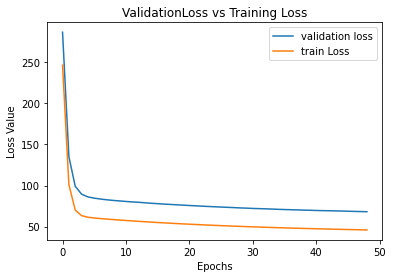

In [146]:
plt.plot(val_loss,label="validation loss")
plt.plot(train_loss,label="train Loss")
plt.legend()
plt.title("ValidationLoss vs Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()


- Repeating the previous step with polynomial regression. Using validation loss, exploring if your model overfits/underfits the data.

In [39]:
# Transforming the training and validation data by adding polynomial features

# remove categorical feature before going polynomial

poly_features = PolynomialFeatures(degree=2, include_bias=False)
train_x_poly = poly_features.fit_transform(train_x)
val_x_poly = poly_features.fit_transform(val_x)
test_x_poly = poly_features.fit_transform(test_x)

In [149]:
train_x_poly.shape
train_y.shape

(1559,)

In [40]:
# Adding x0 = 1 to each instance of both training and testing sets
# This will be used only with Normal Equation
train_x_poly_b = np.c_[np.ones(train_x_poly.shape[0]), train_x_poly]
test_x_poly_b = np.c_[np.ones(test_x_poly.shape[0]), test_x_poly]

# Computing the model parameters using Normal Equation
theta_best_poly = np.linalg.inv(train_x_poly_b.T.dot(train_x_poly_b)).dot(train_x_poly_b.T).dot(train_y)
theta_best_poly

array([ 9.34727691e+01,  2.81012401e-02,  5.10249616e+00, -1.15779755e+01,
       -1.59716497e+01, -2.58291560e+01,  4.84099541e+00, -5.48019552e+01,
       -6.18328574e+01, -8.47265664e-05, -9.75142687e-03,  7.40186262e-02,
        7.45806022e-02, -6.85847904e-04, -4.19899100e-02, -1.63010398e-01,
        4.71699431e-02, -5.08602952e-01,  4.86354799e+00, -4.49380781e+00,
       -2.18776386e+00,  2.92815992e+00, -1.93824141e+00, -1.50907137e+00,
       -8.22075452e+00,  1.07818733e+01,  4.70709391e+01, -8.37789272e+00,
        2.91878244e+01,  2.26632000e+01,  1.36789959e+01, -1.48862373e+00,
       -5.26495216e+00, -1.80114243e+01, -1.70297305e+00, -1.41612941e+00,
        6.60862653e+00, -1.63799783e+01, -1.34304213e+01,  1.12430980e+00,
        4.61339061e+00,  6.93259767e+00,  3.10798221e+01,  4.92966610e+01,
        1.49620048e+01])

In [41]:
# Using scikit-learn (more efficient as compared to above approach as sklearn uses SVD)
lin_reg = LinearRegression()
lin_reg.fit(train_x_poly, train_y)
lin_reg.intercept_, lin_reg.coef_

(93.47276905464798,
 array([ 2.81012401e-02,  5.10249616e+00, -1.15779755e+01, -1.59716497e+01,
        -2.58291560e+01,  4.84099541e+00, -5.48019552e+01, -6.18328574e+01,
        -8.47265664e-05, -9.75142687e-03,  7.40186262e-02,  7.45806022e-02,
        -6.85847904e-04, -4.19899100e-02, -1.63010398e-01,  4.71699431e-02,
        -5.08602952e-01,  4.86354799e+00, -4.49380781e+00, -2.18776386e+00,
         2.92815992e+00, -1.93824141e+00, -1.50907137e+00, -8.22075452e+00,
         1.07818733e+01,  4.70709391e+01, -8.37789272e+00,  2.91878244e+01,
         2.26632000e+01,  1.36789959e+01, -1.48862373e+00, -5.26495216e+00,
        -1.80114243e+01, -1.70297305e+00, -1.41612941e+00,  6.60862653e+00,
        -1.63799783e+01, -1.34304213e+01,  1.12430980e+00,  4.61339061e+00,
         6.93259767e+00,  3.10798221e+01,  4.92966610e+01,  1.49620048e+01]))

We can see that the sklearn library's LinearRegression also computes the model parameters using the Normal Equation.

In [44]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [45]:
lin_scores = cross_val_score(lin_reg, train_x_poly, train_y, scoring='neg_mean_squared_error', cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.83949417 4.01914034 3.73366727 3.6493271 ]
Mean: 3.8104072166424316
Standard Deviation: 0.13806827117124965


In [46]:
# Evaluating the model on the test set
test_predictions = lin_reg.predict(test_x_poly)
test_mse = mean_squared_error(test_predictions, test_y)
test_rmse = np.sqrt(test_mse)
print(f'MSE: {test_mse} \t\t RMSE: {test_rmse}')

MSE: 12.974215539795741 		 RMSE: 3.6019738394102396


In [48]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

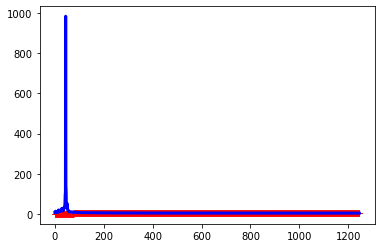

In [49]:
plt.fig
plot_learning_curves(lin_reg, train_x_poly, train_y)